# Regression Model
This project is about Regression models. I will explore the model parameters to find out conditions that'll make the model underfit, overfit, or just right.

### Preparation

In [2]:
%matplotlib inline

In [3]:
#source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### True Function

In [4]:
def true_fun(X):
    return np.sin(5 * np.pi * X)

### Experiments

#### Play with degrees



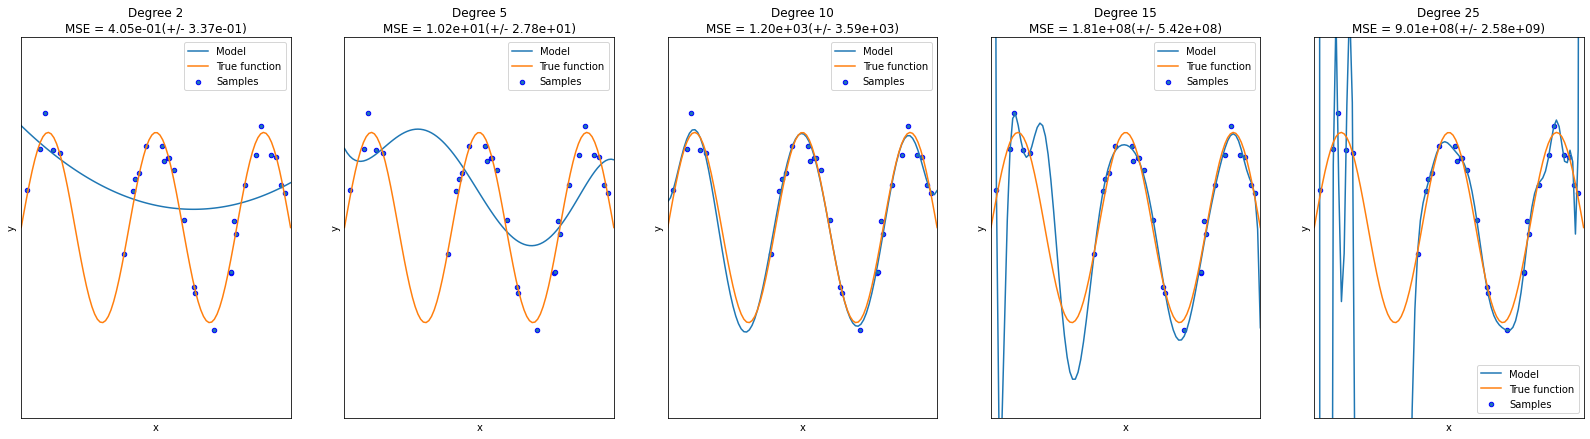

In [5]:
# Generate samples
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(28, 7))

# Mencari model regresi linier & polinomial degre 4 & 15 (silakan coba ubah untuk derajat lainnya)
degrees = [2, 5, 10, 15, 25]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#### Play with random coefficient

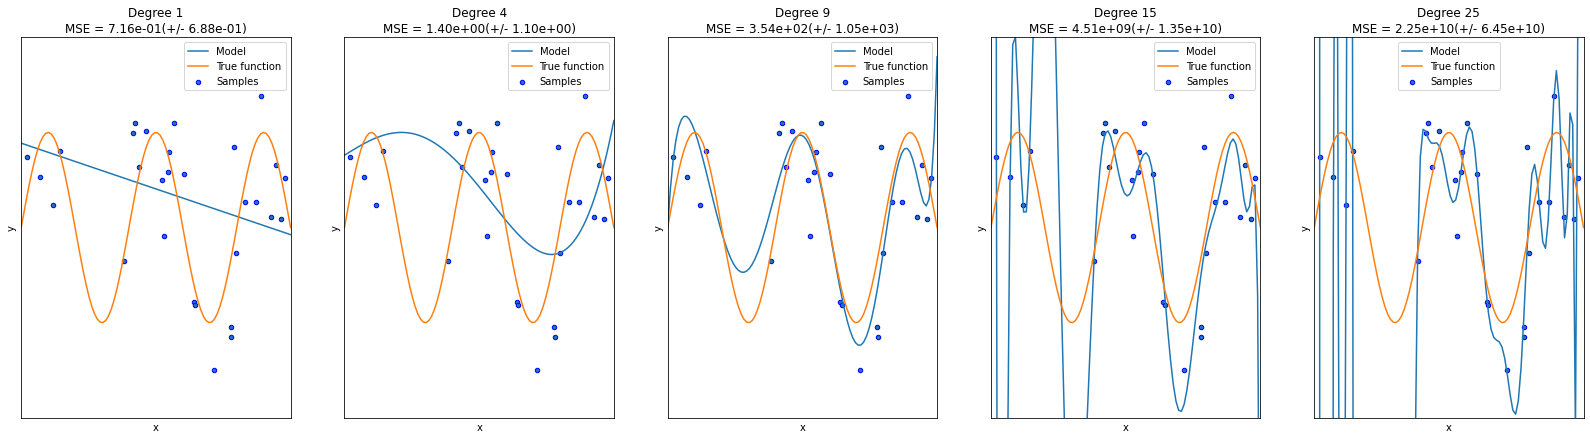

In [6]:
# Generate samples
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.5

plt.figure(figsize=(28, 7))

# Mencari model regresi linier & polinomial degre 4 & 15 (silakan coba ubah untuk derajat lainnya)
degrees = [1, 4, 9, 15, 25]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#### Play with linspace

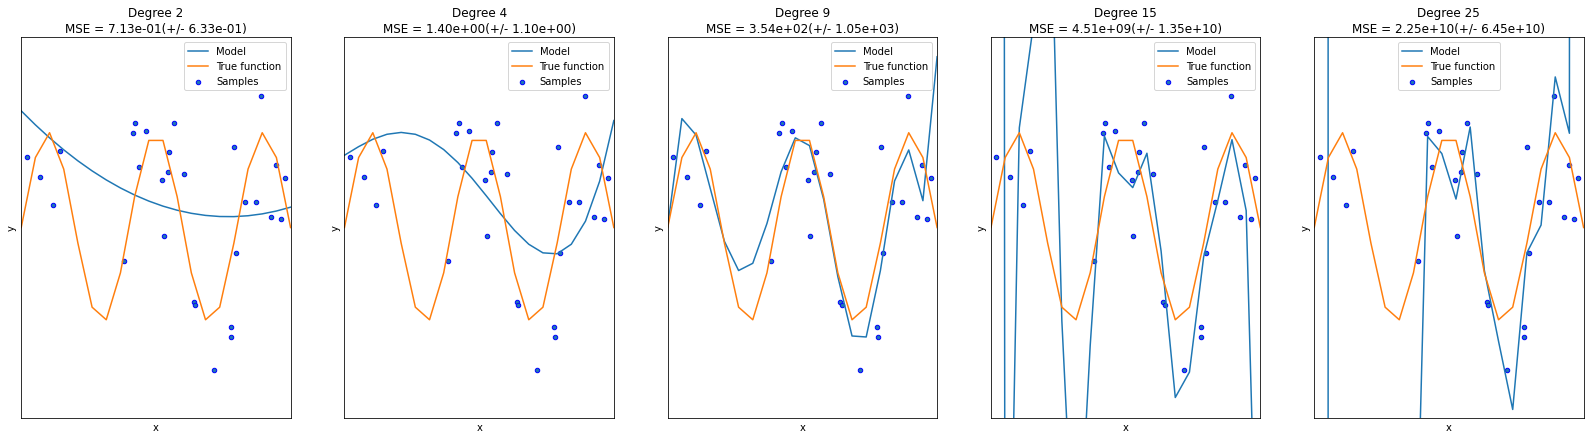

In [7]:
# Generate samples
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.5

plt.figure(figsize=(28, 7))

# Mencari model regresi linier & polinomial degre 4 & 15 (silakan coba ubah untuk derajat lainnya)
degrees = [2, 4, 9, 15, 25]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 20)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### Parameters Behaviour
As we can see from above, these are summary of what happens when we play with those parameters.

*   Degree
    This is the degree of the polynomial line. if the degree is 1, the line will just go straight but the higher the degree it is more likely to be more wavy.

*   Linspace
    The number that i adjust affects the number of output samples. the smaller the value it makes the wave of our line not so smooth. 

*   Random error coeficient
    The bigger the value, it makes the data have more noise.

## Underfit Model

Example of underfit model is the one in the most left on the first experiment. It comes with degree of 2.

## Overfit Model

Example of underfit model is the one on the most right on the first experiment. It comes with degrees of 25. As you can see we are successfully fit all the training data. But when it comes to new data, it will fit badly because the model not able to generalize it.

## Just-Right Model

The just-right model is the one with degree of 5 in the first experiment. It will give you the smallest error. It may not fit every points perfectly, but it is the one with best performance compared to the others.